# 15 minute city - exploratory spatial data analysis

Following:
http://pysal.org/notebooks/explore/esda/Spatial_Autocorrelation_for_Areal_Unit_Data.html

In [1]:
import os
import sys

import pandas as pd
import geopandas as gpd
import osmnx as ox

import esda
import pysal

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

/home/vscode/anaconda3/envs/odc/lib/python3.10/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(
/home/vscode/anaconda3/envs/odc/lib/python3.10/site-packages/osmnx/utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


## Read local data

In [2]:
c = 'Guadalajara'

In [3]:
grl_dir = '/home/edgaregurrola/SIG/ObsCds/Proyectos/Ciudad_15_min/'
nodes_15_min = gpd.read_file(grl_dir+f'Medio_Urbano/Analisis/{c}_15min_Analisis_nodes_vTotals.geojson', driver='GeoJSON')
print(nodes_15_min.shape)
nodes_15_min.head(2)

(195466, 112)


,osmid,metropolis,sip_teatro,sip_cancha,sip_unidad_deportiva,sip_espacio_publico,sip_mercado,clues_primer_nivel,clues_segundo_nivel,clues_tercer_nivel,...,Social,raw_Actividad física,Actividad física,raw_Cultural,Cultural,Entretenimiento,raw_Entretenimiento,15_min_analysis,raw_15_min_analysis,geometry
0,28751344,Guadalajara,0.0,3.909267,17.673810,5.763263,7.665959,7.275387,30.472684,16.857584,...,1,0.75,1,0.0,0,2,1.75,12,11.166667,POINT (-103.30631 20.71153)
1,28753224,Guadalajara,0.0,10.026280,5.894785,4.654675,9.018499,11.194589,18.117875,37.048139,...,1,0.75,1,0.0,0,2,1.75,11,10.416667,POINT (-103.31665 20.70065)


In [4]:
res = 8
hex_dist_res8 = gpd.read_file(grl_dir+f'Medio_Urbano/Analisis/{c}_15min_Analisis_HexRes{res}_vTotals.geojson', driver='GeoJSON')
res = 9
hex_dist_res9 = gpd.read_file(grl_dir+f'Medio_Urbano/Analisis/{c}_15min_Analisis_HexRes{res}_vTotals.geojson', driver='GeoJSON')

In [5]:
print(hex_dist_res8.shape)
hex_dist_res8.head(2)

(1160, 111)


,hex_id_8,sip_teatro,sip_cancha,sip_unidad_deportiva,sip_espacio_publico,sip_mercado,clues_primer_nivel,clues_segundo_nivel,clues_tercer_nivel,sip_centro_admin,...,Social,raw_Actividad física,Actividad física,raw_Cultural,Cultural,Entretenimiento,raw_Entretenimiento,15_min_analysis,raw_15_min_analysis,geometry
0,88498c9483fffff,0.0,21.054314,77.081654,15.462880,34.773808,8.015414,37.792083,66.408639,58.246391,...,1.0,0.475610,0.990244,0.0,0.0,1.990244,1.475610,10.648780,9.351626,"POLYGON ((-103.35482 20.74167, -103.35027 20.7..."
1,8849ab5933fffff,0.0,13.441838,35.545629,8.153209,33.899840,10.423998,24.711934,139.069620,32.786683,...,1.0,0.568436,1.000000,0.5,1.0,3.000000,2.068436,12.201117,10.905028,"POLYGON ((-103.40840 20.64992, -103.40387 20.6..."


In [6]:
print(hex_dist_res9.shape)
hex_dist_res9.head(2)

(6003, 111)


,hex_id_9,sip_teatro,sip_cancha,sip_unidad_deportiva,sip_espacio_publico,sip_mercado,clues_primer_nivel,clues_segundo_nivel,clues_tercer_nivel,sip_centro_admin,...,Social,raw_Actividad física,Actividad física,raw_Cultural,Cultural,Entretenimiento,raw_Entretenimiento,15_min_analysis,raw_15_min_analysis,geometry
0,8949aa252bbffff,0.0,82.776419,296.284598,11.509728,81.590992,77.138481,70.652399,261.494928,80.649753,...,1.0,0.25,1.0,0.0,0.0,2.0,0.768519,6.518519,4.537037,"POLYGON ((-103.40480 20.46253, -103.40358 20.4..."
1,8949ab5943bffff,0.0,39.076549,75.017473,17.406505,35.853914,20.820088,51.367568,197.413242,60.702885,...,1.0,0.25,1.0,0.5,1.0,3.0,1.750000,8.000000,6.555556,"POLYGON ((-103.40982 20.60369, -103.40860 20.6..."


## Geosilhouettes

In [111]:
import contextily
%matplotlib inline

In [112]:
column_analysis = 'raw_15_min_analysis'

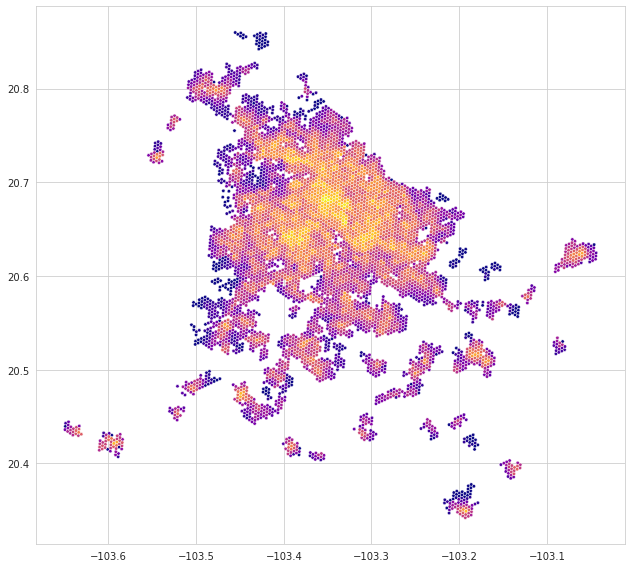

In [175]:
f,ax = plt.subplots(figsize=(12,8), sharex=True, sharey=True)

hex_esda.plot(column_analysis, linewidth=0.4,
              ax=ax, cmap='plasma')

# ax.imshow(basemap, extent=extent, interpolation='bilinear')
# ax.axis(hex_dist_res9.total_bounds[[0,2,1,3]])

f.tight_layout()
plt.show()

### Assigning labels

#### Download municipality limits

In [116]:
schema = 'metropolis'
folder = 'metro_list'

query = f"SELECT * FROM {schema}.{folder} WHERE \"city\" LIKE \'{c}\'"
mun_gdf = aup.gdf_from_query(query, geometry_col='geometry')
mun_gdf = mun_gdf.set_crs("EPSG:4326")
print(mun_gdf.shape)
mun_gdf.head(2)

(10, 6)


,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,geometry,city
0,14002,14,002,Acatlán de Juárez,"POLYGON ((-103.65448 20.50346, -103.65200 20.5...",Guadalajara
1,14039,14,039,Guadalajara,"POLYGON ((-103.31164 20.75098, -103.31014 20.7...",Guadalajara


In [117]:
mun_gdf.crs == hex_dist_res9.crs

True

#### Create centroids from hex_bins

In [118]:
hex_esda = hex_esda.to_crs("EPSG:6372")
centroid = hex_esda.set_index('hex_id_9').centroid
hex_esda = hex_esda.to_crs("EPSG:4326")

In [119]:
centroid = gpd.GeoDataFrame(geometry=centroid)
centroid = centroid.to_crs("EPSG:4326")
print(centroid.shape)
centroid.head(2)

(6003, 1)


,geometry
hex_id_9,
8949ab584cfffff,POINT (-103.46939 20.58969)
8949abc9993ffff,POINT (-103.64906 20.43949)


#### Spatial join

In [120]:
centroid = centroid.reset_index()
centroid_mun = gpd.sjoin(centroid, mun_gdf)
print(centroid_mun.shape)
centroid_mun.head(2)

(6001, 8)


,hex_id_9,geometry,index_right,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,city
0,8949ab584cfffff,POINT (-103.46939 20.58969),5,14097,14,097,Tlajomulco de Zúñiga,Guadalajara
3,8949ab5a393ffff,POINT (-103.50288 20.57182),5,14097,14,097,Tlajomulco de Zúñiga,Guadalajara


In [121]:
hex_esda_geosil = pd.merge(hex_esda, centroid_mun[['hex_id_9','NOMGEO']], on='hex_id_9')

### Soilhouettes scores

In [122]:
from sklearn.metrics import silhouette_samples

silhouettes = silhouette_samples(hex_esda_geosil[[column_analysis]].values, hex_esda_geosil.NOMGEO)

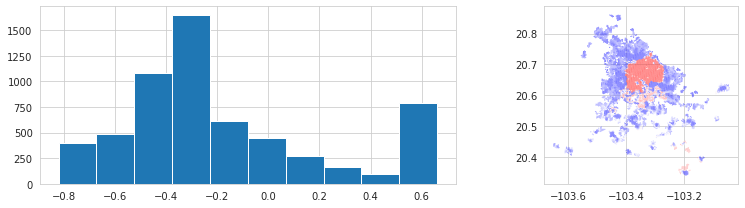

In [124]:
f,ax = plt.subplots(1,2,figsize=(12,3))
ax[0].hist(silhouettes)
hex_esda_geosil.plot(silhouettes, ax=ax[1], cmap='bwr', 
          vmin=-.5, vmax=.5, alpha=.6, linewidth=0.1)
# ax[1].imshow(hex_dist_res9_geosil, interpolation='bilinear')
# ax[1].axis(hex_dist_res9_geosil[column_analysis])
f.tight_layout()
plt.show()

#### Data driven groups

In [125]:
from sklearn.cluster import KMeans

data_driven_clustering = KMeans(n_clusters=10).fit(hex_esda_geosil[[column_analysis]].values)
data_labels = data_driven_clustering.labels_
data_silhouettes = silhouette_samples(hex_esda_geosil[[column_analysis]].values, 
                                      data_labels)

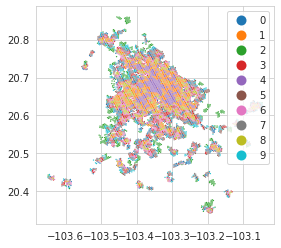

In [127]:
hex_esda_geosil.plot(data_labels, linewidth=0.1,
                     categorical=True, legend=True)
plt.show()

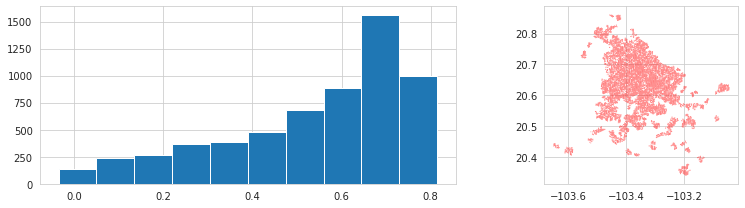

In [128]:
f,ax = plt.subplots(1,2,figsize=(12,3))
ax[0].hist(data_silhouettes)
hex_esda_geosil.plot(data_silhouettes, ax=ax[1], cmap='bwr', 
          vmin=-.5, vmax=.5, alpha=.6, linewidth=0.1)
#vax[1].imshow(basemap, extent=extent, interpolation='bilinear')
#vax[1].axis(deep.total_bounds[[0,2,1,3]])
f.tight_layout()
plt.show()

In [188]:
hex_esda_geosil[column_analysis].values.reshape((-1,1)).shape

(6001, 1)

In [191]:
hex_esda_geosil.NOMGEO.values.reshape((-1,1)).shape

(6001, 1)

In [196]:
from esda.silhouettes import *

nearest_label = nearest_label(hex_esda_geosil[[column_analysis]].values,
                             hex_esda_geosil.NOMGEO.values)

Text(0.5, 1.0, 'Most similar *other* mun to hex ($\\hat{k}_i$)')

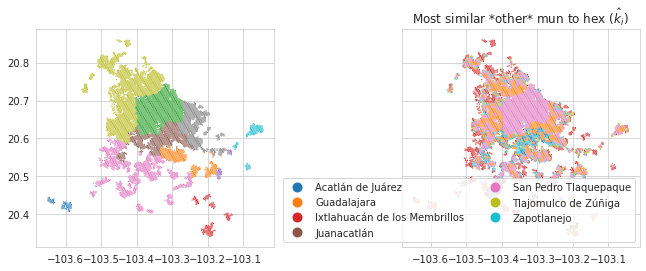

In [201]:
# nearest_outside_state = np.asarray(focus_states)[nearest_label]
f, ax = plt.subplots(1,2,figsize=(12,4), sharex=True, sharey=True)
hex_esda_geosil.plot('NOMGEO', ax=ax[0], categorical=True, linewidth=0.1)
hex_esda_geosil.plot(nearest_label, ax=ax[1],
               legend=True, categorical=True, linewidth=0.1,
               legend_kwds=dict(loc='lower right', ncol=2))
ax[1].set_title('Most similar *other* mun to hex ($\hat{k}_i$)')

In [203]:
wq =  lps.weights.Queen.from_dataframe(hex_esda_geosil)
# wq = lps.weights.distance.Kernel.from_dataframe(df[[column_analysis,'geometry']])


/home/edgaregurrola/anaconda3/envs/odc/lib/python3.10/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 48 disconnected components.
 There are 6 islands with ids: 30, 73, 74, 231, 700, 1093.
  warnings.warn(message)


In [204]:
path_silhouette = esda.path_silhouette(hex_esda_geosil[[column_analysis]].values, 
                                       hex_esda_geosil.NOMGEO, wq)

/home/edgaregurrola/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
/home/edgaregurrola/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


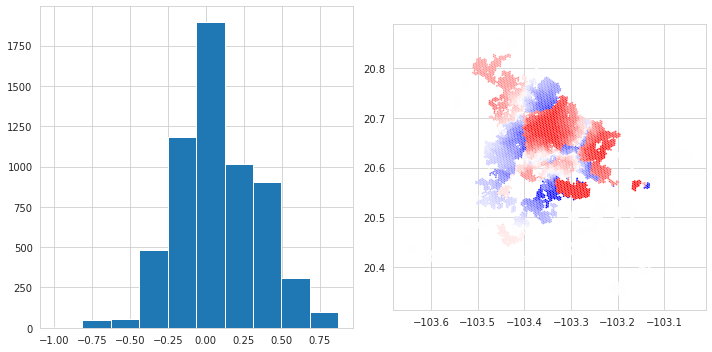

In [206]:
f,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].hist(path_silhouette)
hex_esda_geosil.plot(path_silhouette, ax=ax[1], cmap='bwr',
                     vmin=-.5, vmax=.5, linewidth=0.1)
# ax[1].imshow(basemap, extent=extent, interpolation='bilinear')
# ax[1].axis(deep.total_bounds[[0,2,1,3]])
f.tight_layout()
plt.show()

In [209]:
path_silhouette, next_best_path = esda.path_silhouette(hex_esda_geosil[[column_analysis]].values, 
                                                       hex_esda_geosil.NOMGEO, wq, 
                                                       return_nbfc=True)

/home/edgaregurrola/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
/home/edgaregurrola/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


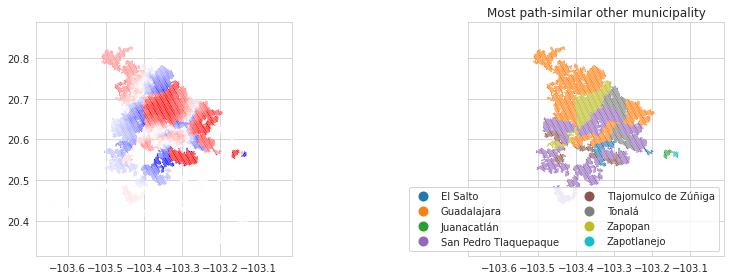

In [211]:
next_best_path_state = np.asarray(next_best_path)
f, ax = plt.subplots(1,2,figsize=(12,4), sharex=True, sharey=True)
hex_esda_geosil.plot(path_silhouette, ax=ax[0], linewidth=0.1,
                     cmap='bwr', vmin=-.5, vmax=.5)
hex_esda_geosil.plot(next_best_path_state, ax=ax[1], linewidth=0.1,
               legend=True, categorical=True, 
               legend_kwds=dict(loc='lower right', ncol=2))
ax[1].set_title('Most path-similar other municipality')

f.tight_layout()
plt.show()

Text(0.5, 1.0, 'Most similar *other* mun to hex ($\\hat{k}_i$)')

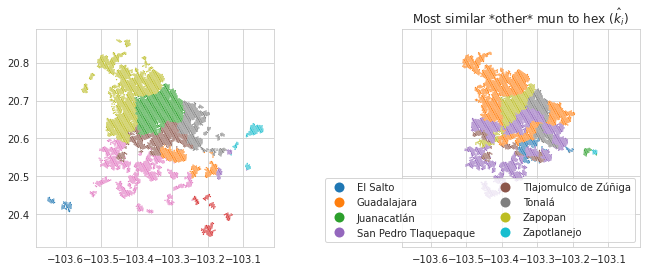

In [213]:
nearest_outside_state = np.asarray(next_best_path)
f, ax = plt.subplots(1,2,figsize=(12,4), sharex=True, sharey=True)
hex_esda_geosil.plot('NOMGEO', ax=ax[0],
                     linewidth=0.1, categorical=True)
hex_esda_geosil.plot(nearest_outside_state, ax=ax[1],
               legend=True, categorical=True, linewidth=0.1,
               legend_kwds=dict(loc='lower right', ncol=2))
ax[1].set_title('Most similar *other* mun to hex ($\hat{k}_i$)')